# hdbscan is the improved version of dbscan
in dbscan it was very hard to reach optimized parameters values
</br>
this problem has been solved in hdbscan and 2 parameters has converted into 1
</br>
we also had hc in which we had to find the number for clustering from dendograms
</br>
this problem has also been solved in hdbscan and these 2 algo has been combined in hdbscan


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd     
import seaborn as sns

(200, 2)
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


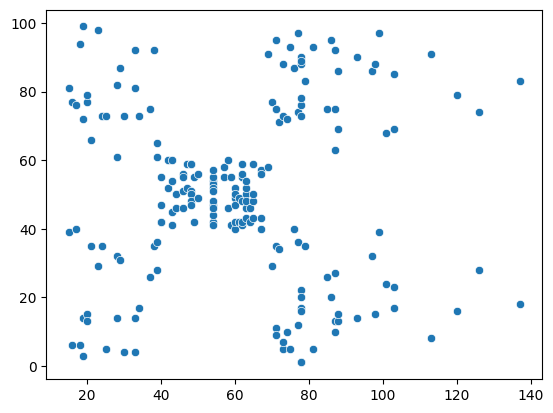

In [4]:
df = pd.read_csv('Mall_customers.csv')
df = df.iloc[:, [3, 4]].values
print(df.shape)
print(df[:5])
sns.scatterplot(x=df[:, 0], y=df[:, 1]);

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[-1  0  1  2  3  4]


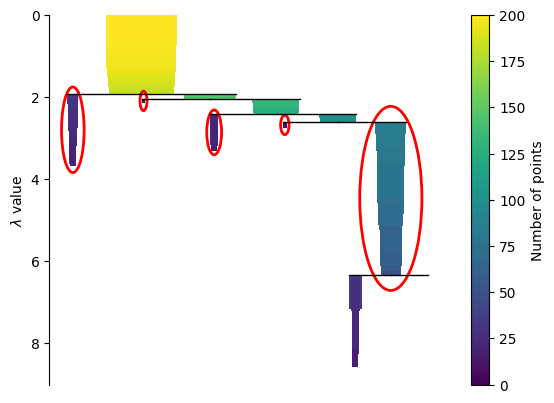

In [13]:
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('hdbscan', hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5))
])

pipe.fit(df)

labels = pipe.named_steps['hdbscan'].labels_
print(np.unique(labels))

pipe.named_steps['hdbscan'].condensed_tree_.plot(select_clusters=True)
plt.show()

# it automatically chose 5 clusters for us and plotted so we can see the clusters

<Axes: >

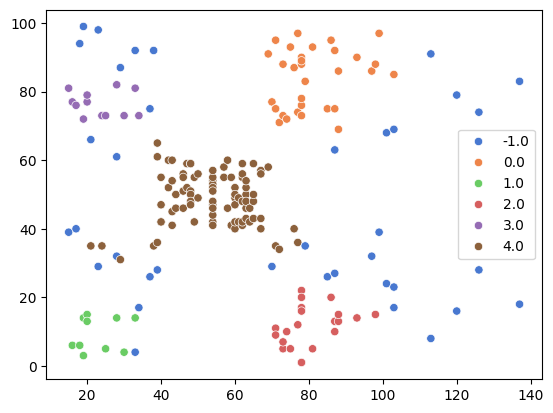

In [15]:
labels = pipe.named_steps['hdbscan'].labels_
sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels.astype(float), palette='muted')

# hdbscan behaves like dbscan and is not good with datasets with various density

(1008, 2)
[[11.2375    3.01746 ]
 [ 5.1105    0.269883]
 [ 6.34456  -3.71832 ]
 [ 9.09493   2.02836 ]
 [ 8.01686  -2.26484 ]]


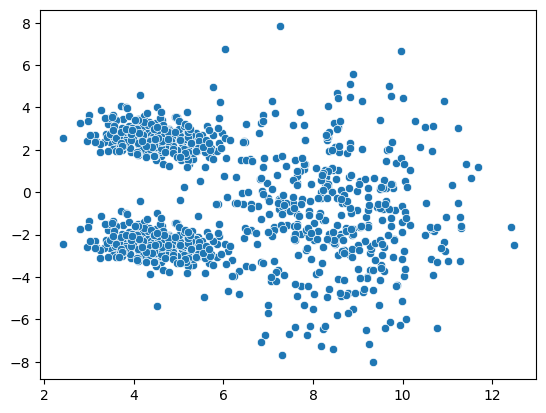

In [20]:
df = pd.read_csv('Artificial.csv')
df = df.iloc[:, [0, 1]].values
print(df.shape)
print(df[:5])
sns.scatterplot(x=df[:, 0], y=df[:, 1]);

[-1  0  1  2]


/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


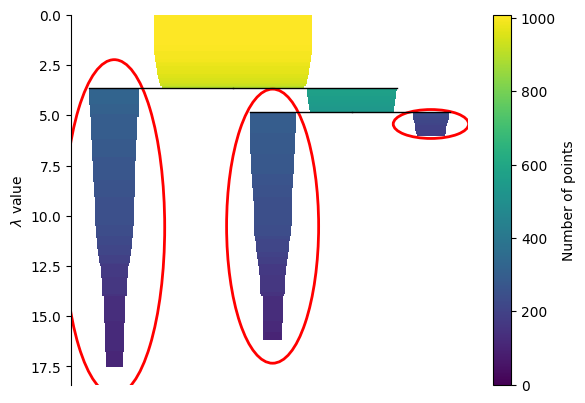

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('hdbscan', hdbscan.HDBSCAN(min_cluster_size=100, min_samples=5))
])

pipe.fit(df)

labels = pipe.named_steps['hdbscan'].labels_
print(np.unique(labels))

pipe.named_steps['hdbscan'].condensed_tree_.plot(select_clusters=True)
plt.show()

<Axes: >

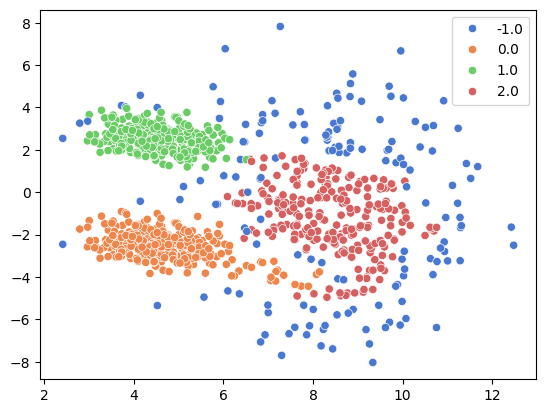

In [ ]:
labels = pipe.named_steps['hdbscan'].labels_
sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels.astype(float), palette='muted')

# hdbscan behaves like dbscan and is not good with datasets with various density
# in places where density is high, it detected properly
# the parameters are not very sensitive like dbscan where changing them by even 0.1 would change the result dramatically
# but here changing them would give the same result 